### Informações pertinentes
https://www.tensorflow.org/tutorials/structured_data/time_series

## Imports

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

## Data Loading

In [16]:
# dtypes for csv fields
dtypes = {
    'city_name':str,
    'description':str,
    'cause_of_incident':str,
    'from_road':str,
    'to_road':str,
    'affected_roads':str,
    'incident_category_desc':str,
    'magnitude_of_delay_desc':str,
    'length_in_meters':int,
    'delay_in_seconds':int,
    'incident_date':str,
    'latitude':float,
    'longitude':float
    }
# dates to be parsed from the csv
parse_dates = ['incident_date']

# read csv
data = pd.read_csv("Traffic_Incidents_Braga.csv", dtype=dtypes, parse_dates=parse_dates)

# drop unwanted columns
unwanted_cols = ['city_name', 'latitude', 'longitude', 'from_road', 'to_road'] 
data = data.drop(unwanted_cols, axis=1)
data.head()

,description,cause_of_incident,affected_roads,incident_category_desc,magnitude_of_delay_desc,length_in_meters,delay_in_seconds,incident_date
0,queuing traffic,NaN,N103,Jam,Moderate,615,111,2019-01-15 19:05:00.065
1,queuing traffic,NaN,N14,Jam,Moderate,1008,210,2019-01-15 19:05:00.066
2,queuing traffic,NaN,N101,Jam,Moderate,615,184,2019-01-15 19:05:00.066
3,stationary traffic,NaN,N101,Jam,Major,322,232,2019-01-15 19:05:00.066
4,stationary traffic,NaN,N201,Jam,Major,208,235,2019-01-15 19:05:00.066


## Data Viz

### Distribuição de incidentes por hora
- linspace: cria 300 elementos, igualmente espaçados entre 0 e 23
- spline: cria uma curva definida ao longo do vários pontos de controlo (as horas, entre 0 e 23)

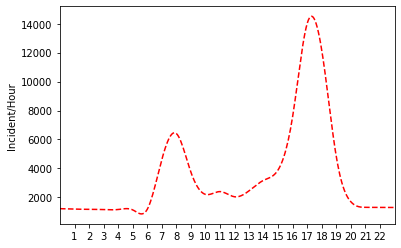

In [150]:
# group by hour
distro = data.incident_date
distro = data.groupby([distro.dt.hour]).count().incident_date 

# smooth the data
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0, 23, 300) 
spl = make_interp_spline(x,y)
ynew = spl(xnew)

# plot
plt.xlim(-0.02, 23)
plt.xticks(range(1, 23))
plt.plot(xnew, ynew, 'r--')
plt.ylabel('Incident/Hour')
plt.show()

### Distribuição de incidentes por dia da semana

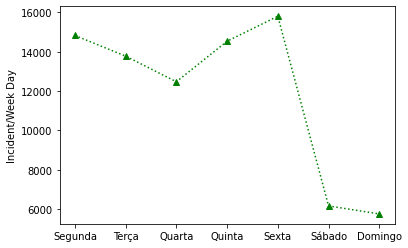

In [129]:
# help vars
dias = [0]*7
diasSemanaStr = ["Segunda","Terça","Quarta","Quinta","Sexta","Sábado","Domingo"]
distro = data.incident_date

# group incidents by week day
for x in list(distro):
    dias[x.weekday()]+=1

plt.plot(diasSemanaStr, dias, 'g:^')
plt.ylabel('Incident/Week Day')
plt.show()

### Distribuição de incidentes por mês

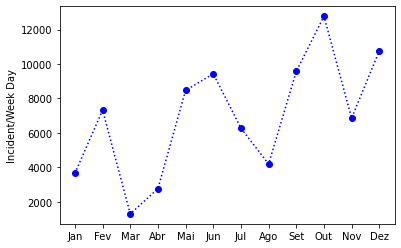

In [140]:
# help vars
meses = [0]*12
mesesStr = ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"]
distro = data.incident_date

# group incidents by week day
for x in list(distro):
    meses[x.month-1]+=1

plt.plot(mesesStr, meses, 'b:o')
plt.ylabel('Incident/Week Day')
plt.show()

-----------

In [152]:
# help vars
meses = [0]*12
mesesStr = ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"]
distro = data.incident_date

# group incidents by week day
for x in list(distro):
    meses[x.month-1]+=1

(array([1., 1., 1., 1., 0., 2., 1., 1., 2., 1., 0., 1.]),
 array([ 1297.        ,  2253.16666667,  3209.33333333,  4165.5       ,
         5121.66666667,  6077.83333333,  7034.        ,  7990.16666667,
         8946.33333333,  9902.5       , 10858.66666667, 11814.83333333,
        12771.        ]),
 <BarContainer object of 12 artists>)

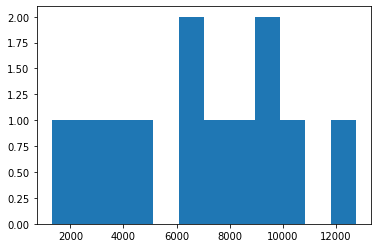

In [153]:
plt.hist(meses, bins=12)